In [1]:
import pandas as pd
from sklearn import metrics
import glob
from sklearn.model_selection import train_test_split
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

<h3>Loading Dataset</h3>

In [2]:
path = '../Dataset/Train/'
train_data = pd.read_csv(path+'balanced_8_class_over_undersampled_train.csv')
train_data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.0,0.00,1.00,64.00,1.379797,1.379797,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.315071e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1
1,0.0,54.00,6.00,64.00,3.860289,3.860289,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.333203e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
2,0.0,53.46,5.94,63.36,4.627503,4.627503,0.0,0.0,0.0,0.0,...,0.273154,54.06,8.331456e+07,9.5,10.401036,0.386753,0.483918,0.16,141.55,1
3,0.0,54.00,6.00,64.00,14.499366,14.499366,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.331373e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
4,0.0,0.00,1.00,64.00,2.236968,2.236968,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.314974e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,1


In [3]:
train_data['label'].value_counts()

label
2    990000
1    900000
8    800000
3    100000
4    100000
5    100000
6    100000
7    100000
Name: count, dtype: int64

In [4]:
# to_remove = np.random.choice(train_data[train_data['label']==1].index,size=800000,replace=False)


In [5]:
# train_data = train_data.drop(to_remove)

In [6]:
# train_data['label'].value_counts()

In [3]:
path = '../Dataset/Test/'
test_data = pd.read_csv(path+'testing_8.csv')
test_data.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,7.068129,156.06,6.00,64.00,0.719511,0.719511,0.0,0.0,1.0,0.0,...,7.876697,56.20,8.297252e+07,9.5,10.618762,11.154942,448.711638,0.15,141.55,2
1,0.000000,54.00,6.00,64.00,6.531785,6.531785,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.336539e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,1
2,0.241525,250358.00,16.89,63.77,680.256340,680.256340,0.0,0.0,0.0,0.0,...,547.051762,906.48,8.337046e+07,9.5,41.361729,773.714755,315237.128613,0.95,141.55,1
3,0.002218,242.57,16.89,64.00,9.093552,9.093552,0.0,0.0,0.0,0.0,...,7.703657,186.01,8.300694e+07,9.5,19.179873,10.924966,748.856479,0.08,141.55,2
4,0.000000,53.46,5.94,63.36,21.089595,21.089595,0.0,0.0,0.0,0.0,...,0.115267,54.06,8.333106e+07,9.5,10.395170,0.163466,0.167653,0.08,141.55,1


In [5]:
test_data['label'].value_counts()

label
1    6798313
2    1616144
7     527383
8     219747
4      97140
5      70964
6       5035
3       2590
Name: count, dtype: int64

<h3>Train and Test split</h3>

In [9]:
# feature_cols = data.columns.to_list()[:-1]
# X = data[feature_cols] #Features
# y = data.label #target

In [10]:
# X_train,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h3>Data Preprocessing</h2>

In [9]:
X_train = train_data.drop(columns='label',axis=1).to_numpy()
X_test = test_data.drop(columns='label',axis=1).to_numpy()

<h2>Using D-Tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
clf = DecisionTreeClassifier(max_depth=33,class_weight='balanced')

clf.fit(X_train,train_data['label'])

DecisionTreeClassifier(class_weight='balanced', max_depth=33)

In [8]:
predicted = clf.predict(X_test)

In [9]:
print(metrics.accuracy_score(test_data['label'], predicted))
print(classification_report(test_data['label'], predicted))

0.995043115173568
              precision    recall  f1-score   support

           1       1.00      1.00      1.00   6798313
           2       1.00      1.00      1.00   1616144
           3       0.29      0.71      0.41      2590
           4       0.92      0.83      0.87     97140
           5       0.86      0.83      0.84     70964
           6       0.36      0.74      0.48      5035
           7       1.00      1.00      1.00    527383
           8       0.92      0.94      0.93    219747

    accuracy                           1.00   9337316
   macro avg       0.79      0.88      0.82   9337316
weighted avg       1.00      1.00      1.00   9337316



In [10]:
print(metrics.accuracy_score(test_data['label'], predicted))
print(metrics.precision_score(test_data['label'], predicted, average='weighted'))
print(metrics.recall_score(test_data['label'], predicted, average='weighted'))
print(metrics.f1_score(test_data['label'], predicted, average='weighted'))

0.995043115173568
0.9956057710227053
0.995043115173568
0.9952374378096794


In [11]:
tpr = metrics.recall_score(test_data['label'], predicted, average='micro')
tnr = metrics.recall_score(test_data['label'], predicted, average='micro') 
fpr = 1 - tnr
fnr = 1 - tpr

print(fpr,fnr)

0.00495270803729897 0.00495270803729897


In [5]:
unique_classes = ['DDoS','DoS', 'BruteForce', 'Spoofing', 'Recon', 'Web', 'Mirai', 'Benign']

In [12]:
cm = metrics.confusion_matrix(test_data['label'], predicted)

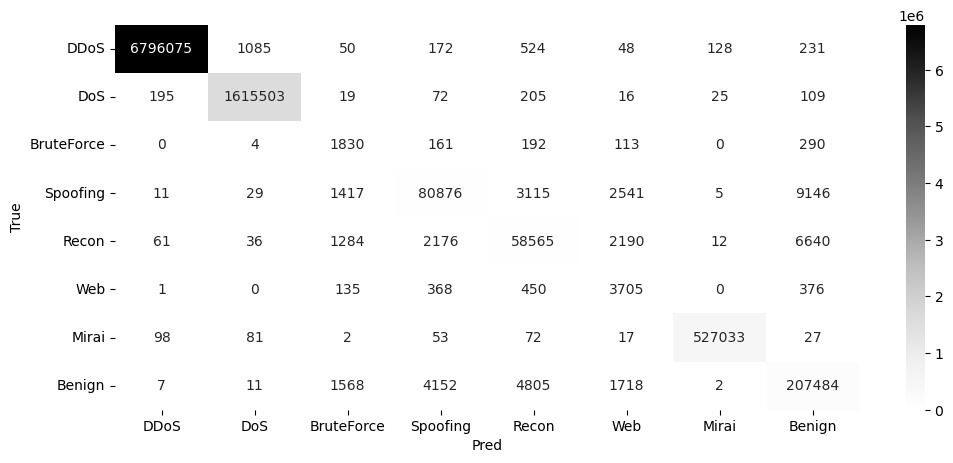

In [16]:
## Plot confusion matrix
fig, ax = plt.subplots()
sn.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Greys,
            cbar=True)
ax.set(xlabel="Pred", ylabel="True", xticklabels=unique_classes,
       yticklabels=unique_classes)
plt.rcParams["figure.figsize"] = (12,5)
plt.yticks(rotation=0)
plt.show()

In [6]:
def calculate_multiclass_brier_score(y_true, y_prob):
    """
    Calculate the Brier score for multiclass classification.

    Parameters:
    y_true (array-like): True labels.
    y_prob (array-like): Predicted probabilities for each class.

    Returns:
    float: Average Brier score.
    """
    brier_scores = []
    for cls in range(y_prob.shape[1]):  # Iterate over the number of classes
        y_true_binary = (y_true == cls).astype(int)
        y_prob_cls = y_prob[:, cls]
        brier_scores.append(metrics.brier_score_loss(y_true_binary, y_prob_cls))
    return np.mean(brier_scores)

In [18]:
# Calculate multiclass Brier score
y_prob = clf.predict_proba(X_test)
multiclass_brier_score = calculate_multiclass_brier_score(test_data['label'], y_prob)
print(f'Multiclass Brier score: {multiclass_brier_score:.4f}')

Multiclass Brier score: 0.2467


In [4]:
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [23]:
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer(X_test[:25000])

In [24]:
# shap_values.shape

In [25]:
# shap.summary_plot(shap_values[:, :, 0], plot_type="violin", class_names=["Cluster 1"], show=False)
# plt.show()

In [5]:
import xgboost

In [21]:
print(np.unique(train_data['label']))
np.unique(test_data['label'])

[1 2 3 4 5 6 7 8]


array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [6]:
y_train = np.array(train_data['label'])-1
y_test = np.array(test_data['label'])-1

In [7]:
xgb_classifier = xgboost.XGBClassifier(max_depth=33, objective='multi:softmax', n_estimators=300)

In [10]:
xgb_model = xgb_classifier.fit(X_train, y_train)
xgb_predicted_values = xgb_model.predict(X_test)

In [12]:
np.unique(xgb_predicted_values)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [11]:
print(classification_report(y_test , xgb_predicted_values,target_names=['DDoS','DoS', 'BruteForce', 'Spoofing', 'Recon', 'Web', 'Mirai', 'Benign']))

              precision    recall  f1-score   support

        DDoS       1.00      1.00      1.00   6798313
         DoS       1.00      1.00      1.00   1616144
  BruteForce       0.69      0.68      0.68      2590
    Spoofing       0.96      0.83      0.89     97140
       Recon       0.91      0.83      0.87     70964
         Web       0.53      0.69      0.60      5035
       Mirai       1.00      1.00      1.00    527383
      Benign       0.91      0.99      0.95    219747

    accuracy                           1.00   9337316
   macro avg       0.88      0.88      0.87   9337316
weighted avg       1.00      1.00      1.00   9337316



In [12]:
print(metrics.accuracy_score(y_test, xgb_predicted_values))
print(metrics.precision_score(y_test, xgb_predicted_values, average='weighted'))
print(metrics.recall_score(y_test, xgb_predicted_values, average='weighted'))
print(metrics.f1_score(y_test, xgb_predicted_values, average='weighted'))

0.9961561759289286
0.9963051920890292
0.9961561759289286
0.996113545378396


In [13]:
xgb_cm = metrics.confusion_matrix(y_test, xgb_predicted_values)

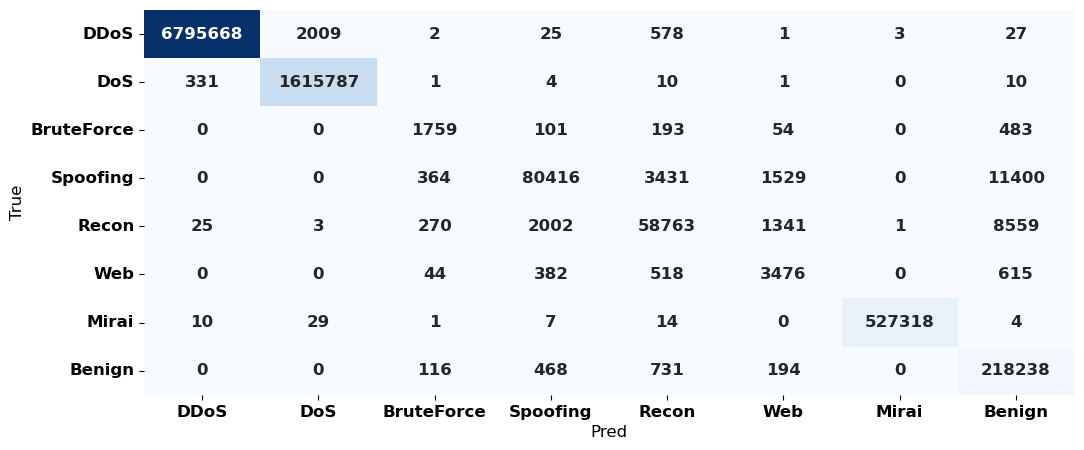

In [22]:
## Plot confusion matrix
unique_classes = ['DDoS','DoS', 'BruteForce', 'Spoofing', 'Recon', 'Web', 'Mirai', 'Benign']
fig, ax = plt.subplots()
sn.heatmap(xgb_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xticklabels=unique_classes,
       yticklabels=unique_classes)
ax.set_xlabel("Pred", fontsize=12)
ax.set_ylabel("True", fontsize=12)
plt.rcParams["figure.figsize"] = (12,5)
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})
plt.xticks(rotation=-0)
plt.yticks(rotation=-0)
plt.show()

In [30]:
FP = xgb_cm.sum(axis=0) - np.diag(xgb_cm)  
FN = xgb_cm.sum(axis=1) - np.diag(xgb_cm)
TP = np.diag(xgb_cm)
TN = xgb_cm.sum() - (FP + FN + TP)

print(TP,TN,FP,FN)

[6795658 1615781    1758   80129   58486    3460  527315  218233] [2538630 7719125 9333920 9237205 9260801 9329045 8809928 9096062] [  373  2047   806  2971  5551  3236     5 21507] [ 2655   363   832 17011 12478  1575    68  1514]


In [31]:
# Calculate multiclass Brier score
y_prob = xgb_model.predict_proba(X_test)
multiclass_brier_score = calculate_multiclass_brier_score(y_test, y_prob)
print(f'Multiclass Brier score: {multiclass_brier_score:.4f}')

Multiclass Brier score: 0.0008


In [23]:
# base case is Benign class
tp_instances = np.where((y_test == 7) & (xgb_predicted_values == 7))[0]
fp_instances = np.where((y_test != 7) & (xgb_predicted_values == 7))[0]
fn_instances = np.where((y_test == 7) & (xgb_predicted_values != 7))[0]

In [25]:
rng = np.random.default_rng()

In [26]:
# compute SHAP values for the best model (80:20 split xgboot)
tp_7_explainer = shap.TreeExplainer(xgb_classifier)
tp_7_shap_values = tp_7_explainer(rng.choice(X_test[tp_instances], 10000),check_additivity=False)

[20:50:39] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [27]:
tp_7_shap_values.feature_names = train_data.columns[:-1]

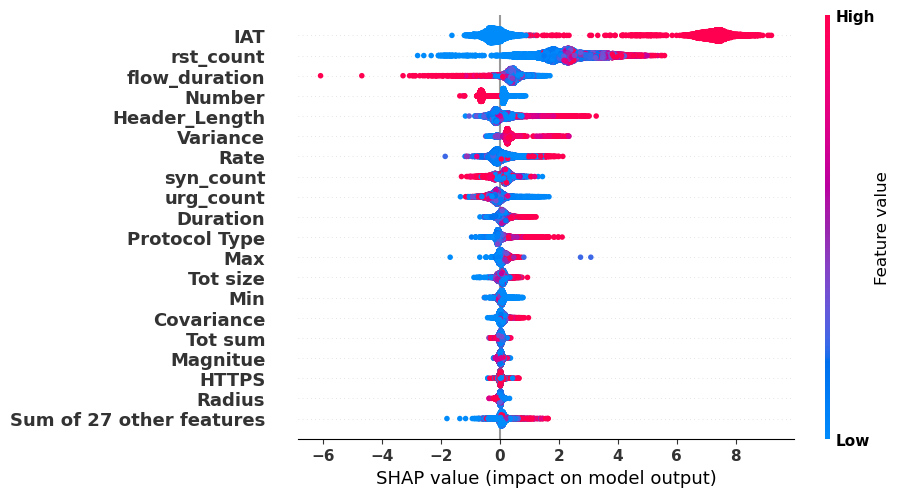

In [29]:
shap.plots.beeswarm(tp_7_shap_values[:, :, 7] , max_display=20, plot_size=0.2)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


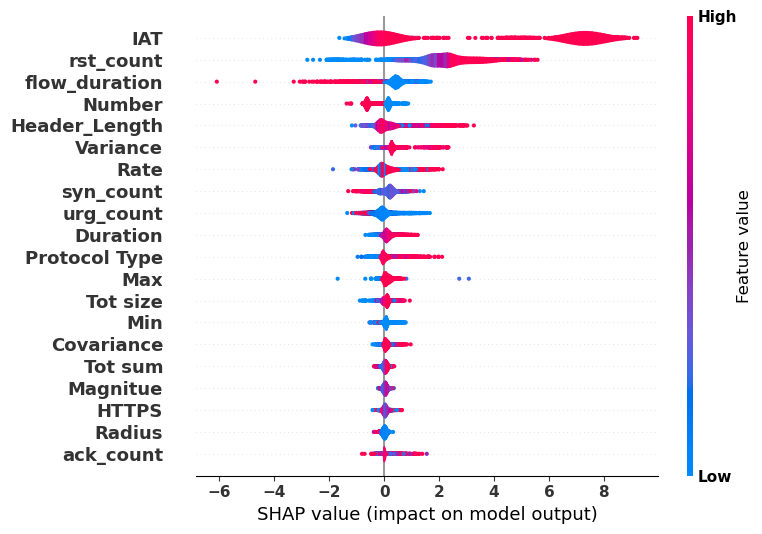

In [38]:
shap.summary_plot(tp_7_shap_values[:, :, 7], plot_type="violin", class_names=unique_classes, plot_size=0.2,max_display=20)

895


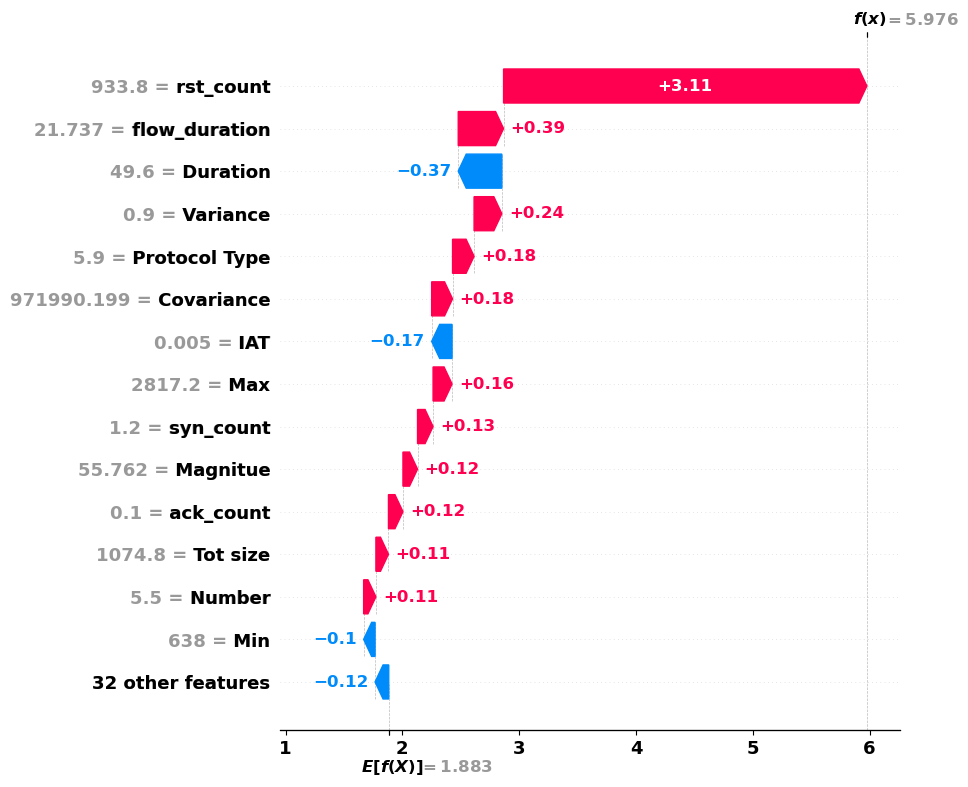

In [33]:
import random
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tp_7_shap_values[randi,:,7],max_display=15)

468


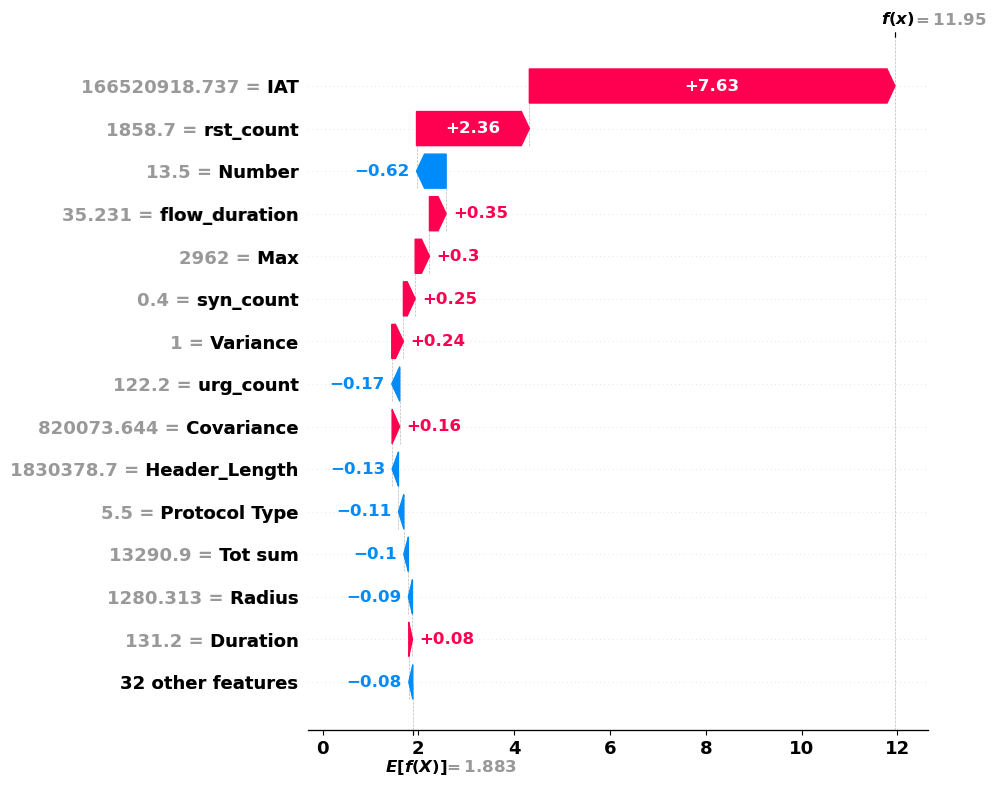

In [34]:
import random
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tp_7_shap_values[randi,:,7],max_display=15)

3197


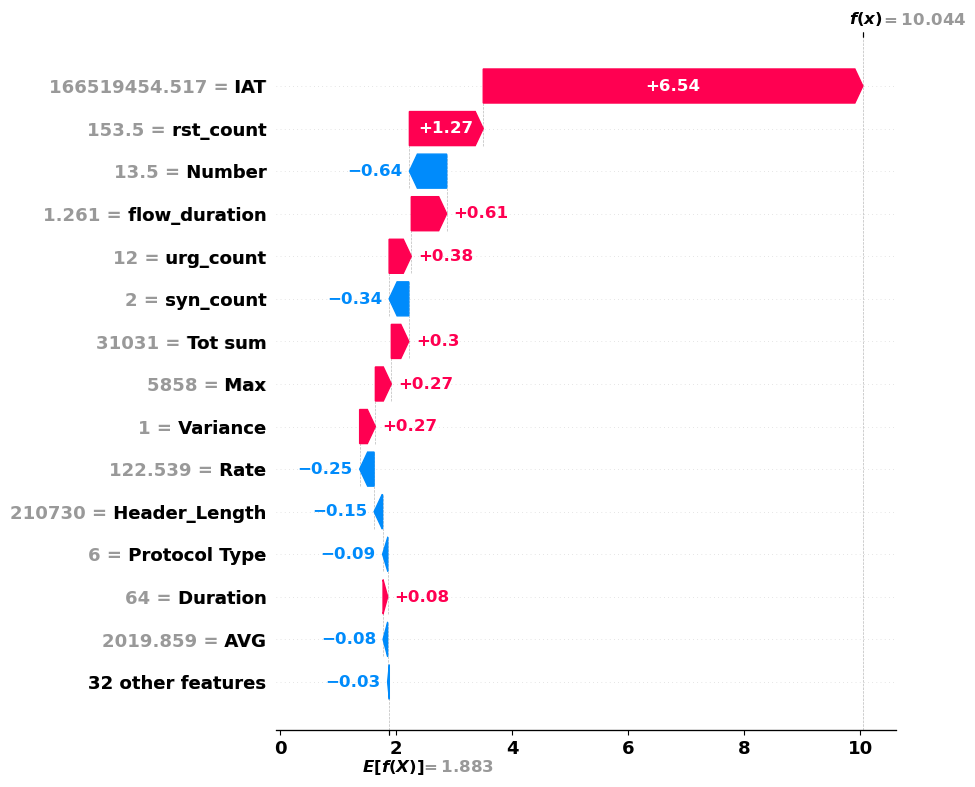

In [35]:
import random
randi = random.randint(0,10000)
print(randi)
shap.plots.waterfall(tp_7_shap_values[randi,:,7],max_display=15)

In [36]:
# compute SHAP values for the best model (80:20 split xgboot)
fp_7_explainer = shap.TreeExplainer(xgb_classifier)
fp_7_shap_values = fp_7_explainer(rng.choice(X_test[fp_instances], min(len(fp_instances),1000)),check_additivity=False)

[21:24:26] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [39]:
fp_7_shap_values.feature_names = train_data.columns[:-1]

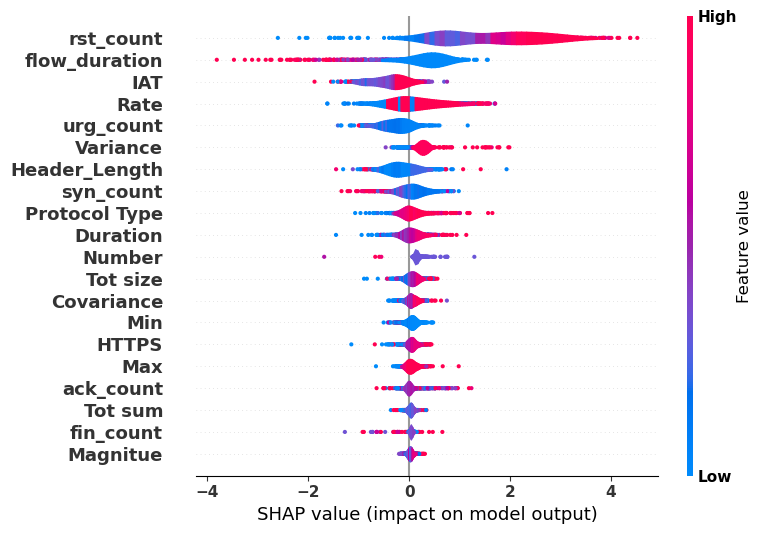

In [41]:
shap.summary_plot(fp_7_shap_values[:, :, 7], plot_type="violin", class_names=unique_classes, plot_size=0.2,max_display=20)

87


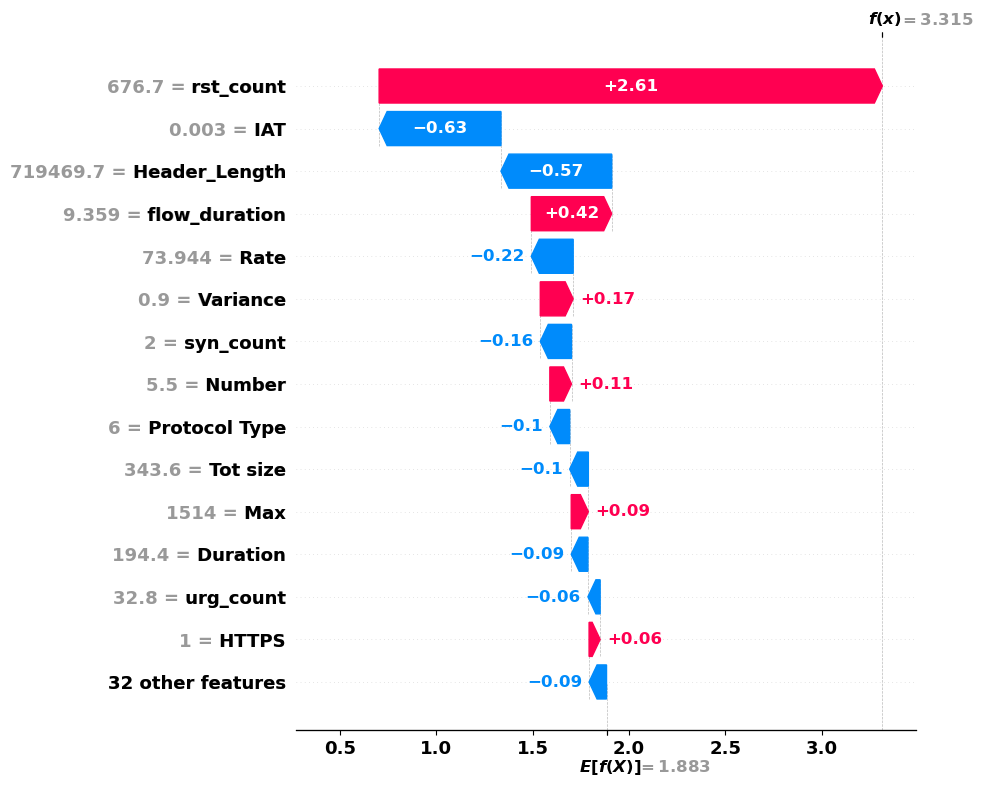

In [54]:
import random
randi = random.randint(0,750)
print(randi)
shap.plots.waterfall(fp_7_shap_values[randi,:,7],max_display=15)

292


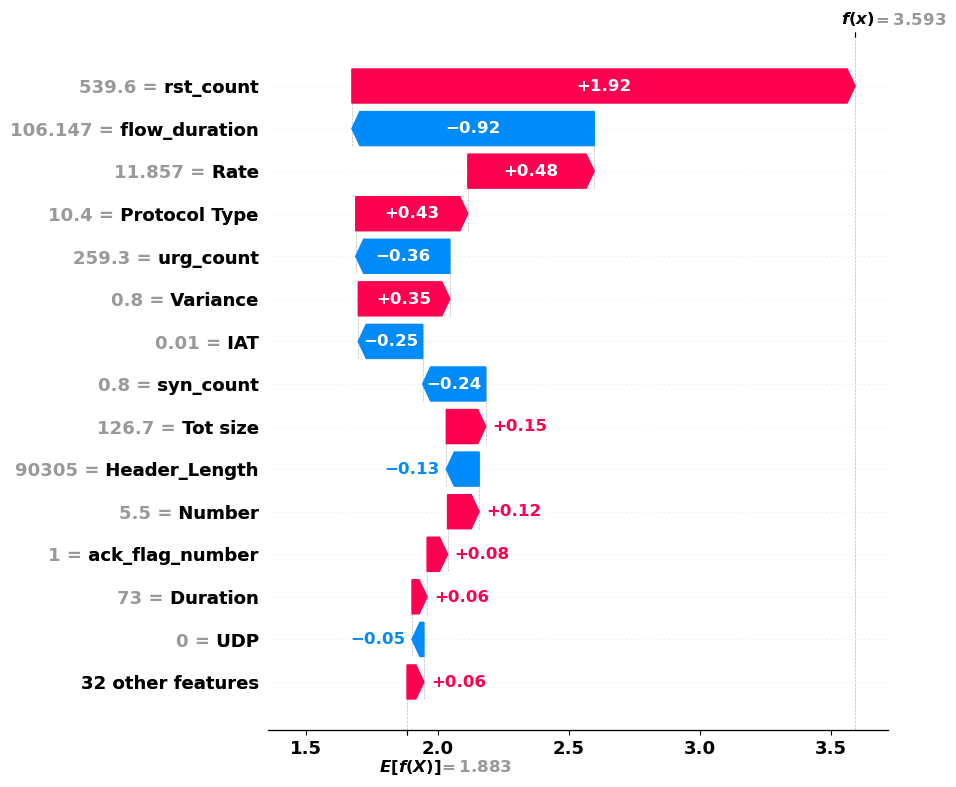

In [47]:
import random
randi = random.randint(0,750)
print(randi)
shap.plots.waterfall(fp_7_shap_values[randi,:,7],max_display=15)

200


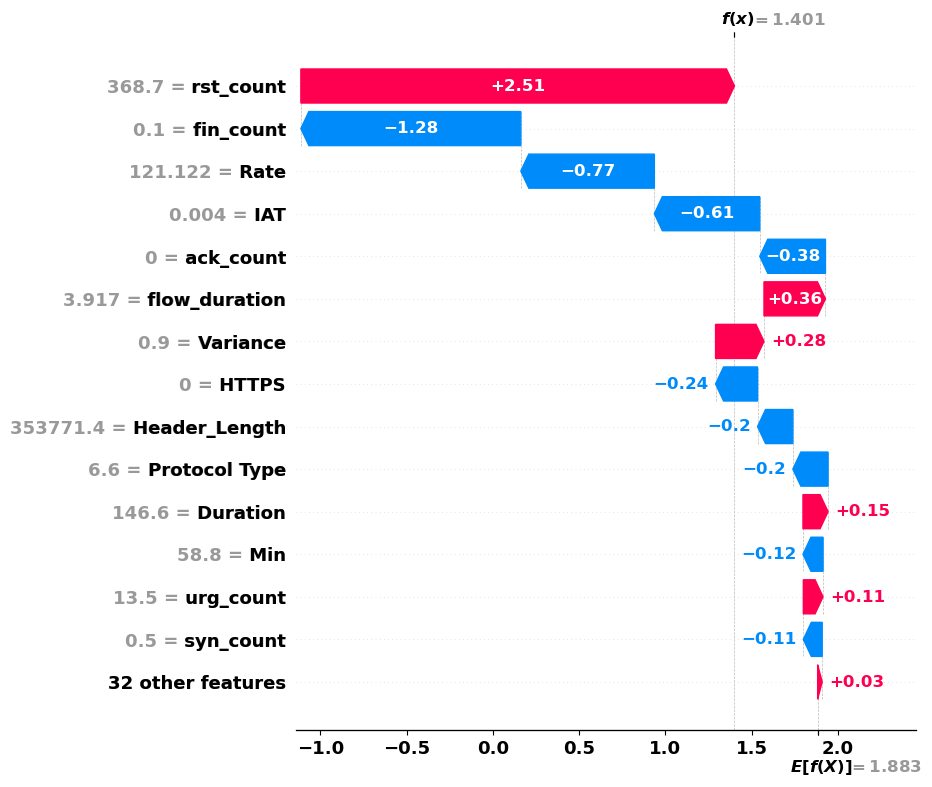

In [45]:
import random
randi = random.randint(0,750)
print(randi)
shap.plots.waterfall(fp_7_shap_values[randi,:,7],max_display=15)

In [55]:
# compute SHAP values for the best model (80:20 split xgboot)
fn_7_explainer = shap.TreeExplainer(xgb_classifier)
fn_7_shap_values = fn_7_explainer(rng.choice(X_test[fn_instances], min(len(fn_instances),1000)),check_additivity=False)
fn_7_shap_values.feature_names = train_data.columns[:-1]

[21:28:27] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


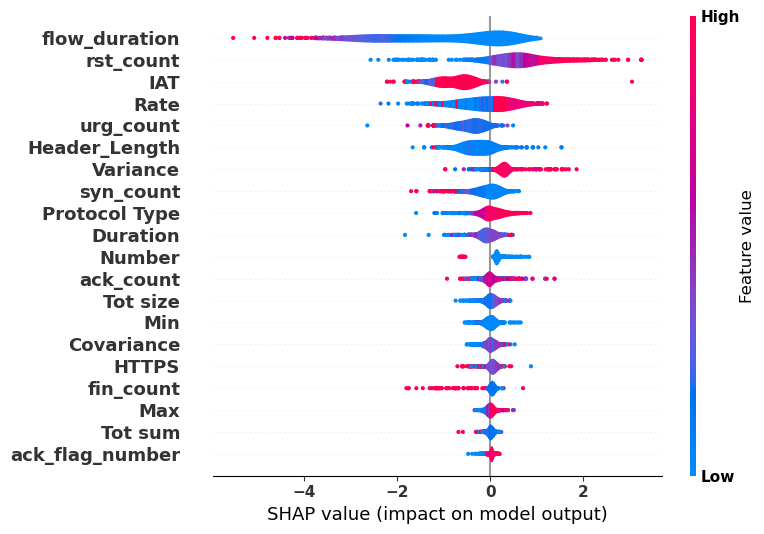

In [56]:
shap.summary_plot(fn_7_shap_values[:, :, 7], plot_type="violin", class_names=unique_classes, plot_size=0.2,max_display=20)

517


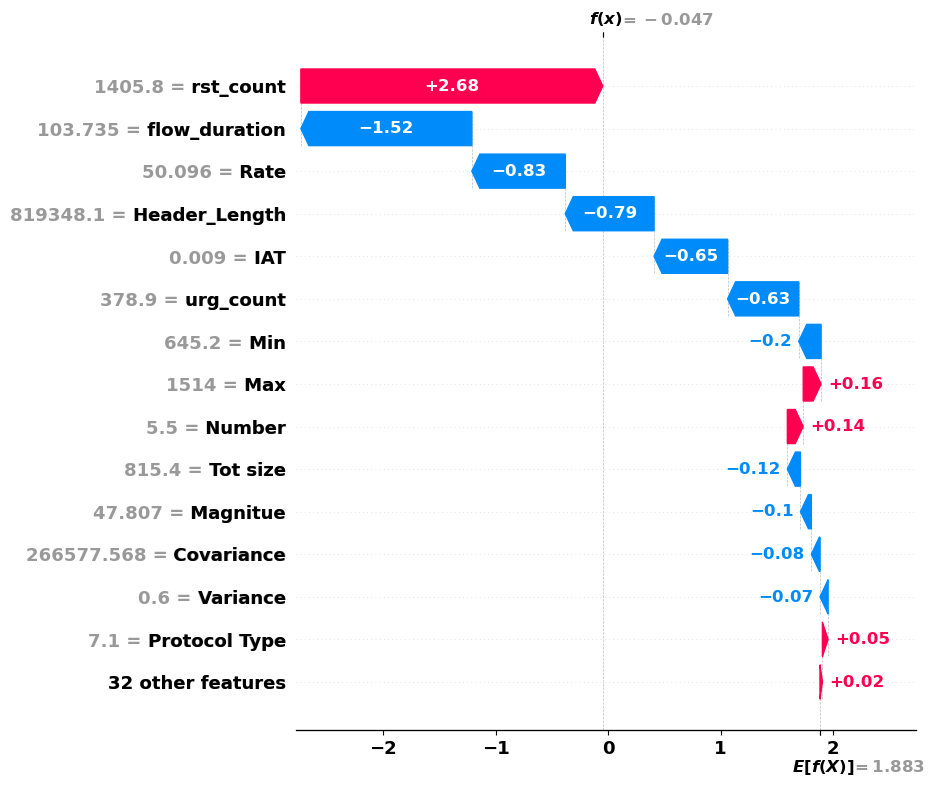

In [57]:
import random
randi = random.randint(0,750)
print(randi)
shap.plots.waterfall(fn_7_shap_values[randi,:,7],max_display=15)

41


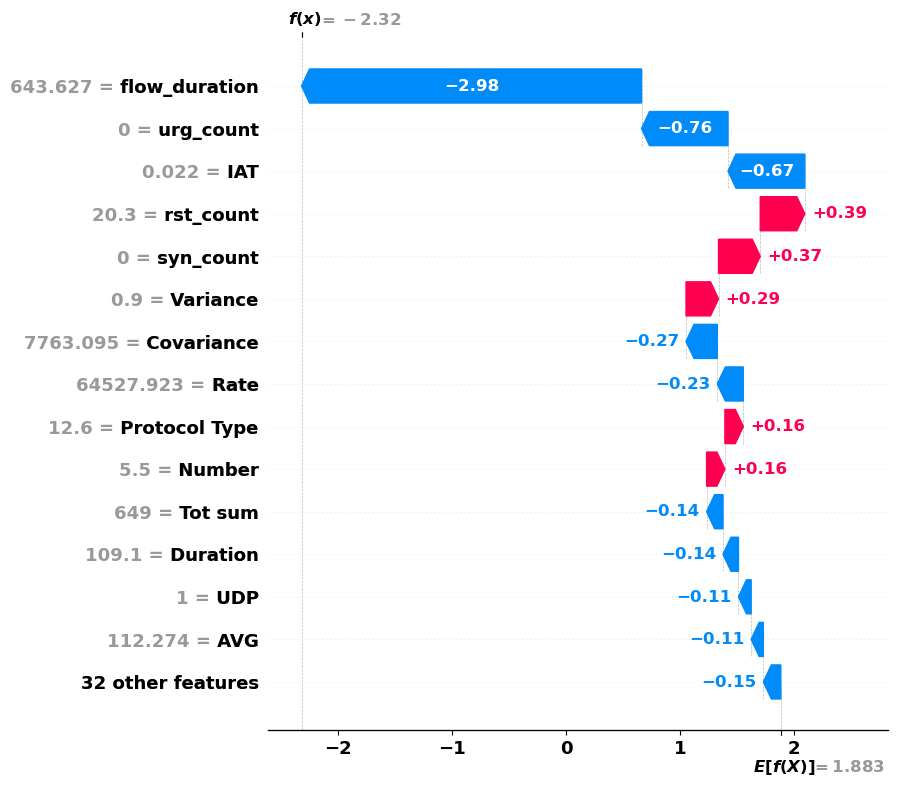

In [58]:
import random
randi = random.randint(0,750)
print(randi)
shap.plots.waterfall(fn_7_shap_values[randi,:,7],max_display=15)

152


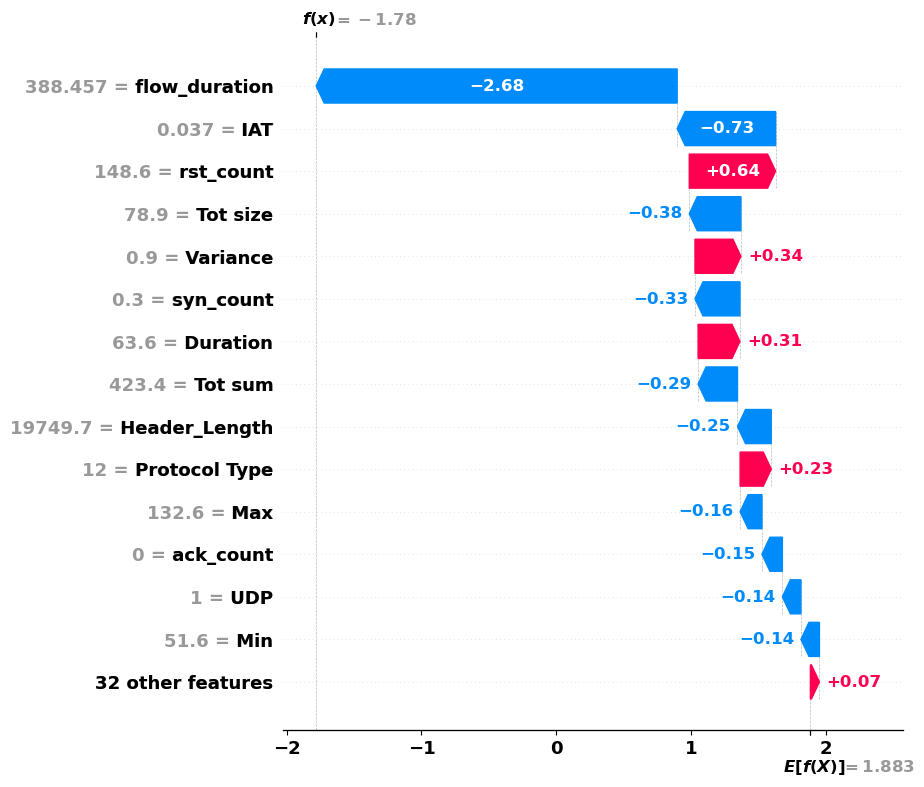

In [60]:
import random
randi = random.randint(0,750)
print(randi)
shap.plots.waterfall(fn_7_shap_values[randi,:,7],max_display=15)

372


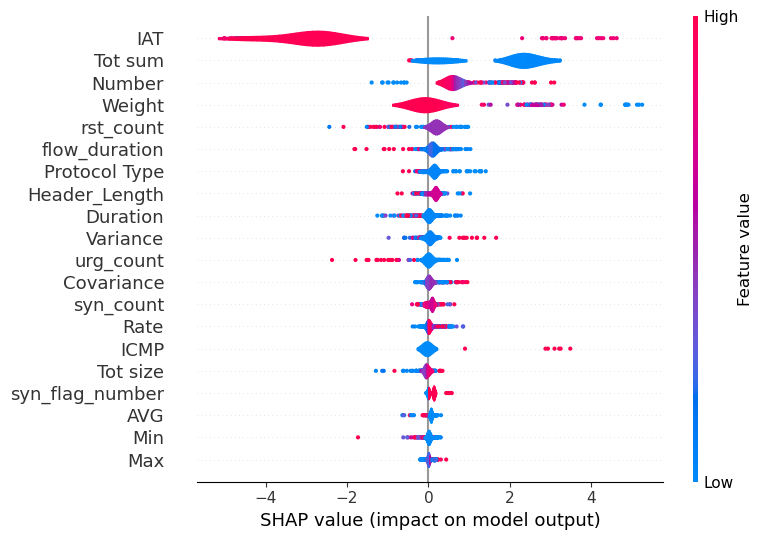

In [110]:
# Identify false positives for a specific class
specific_class = 0
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

2668


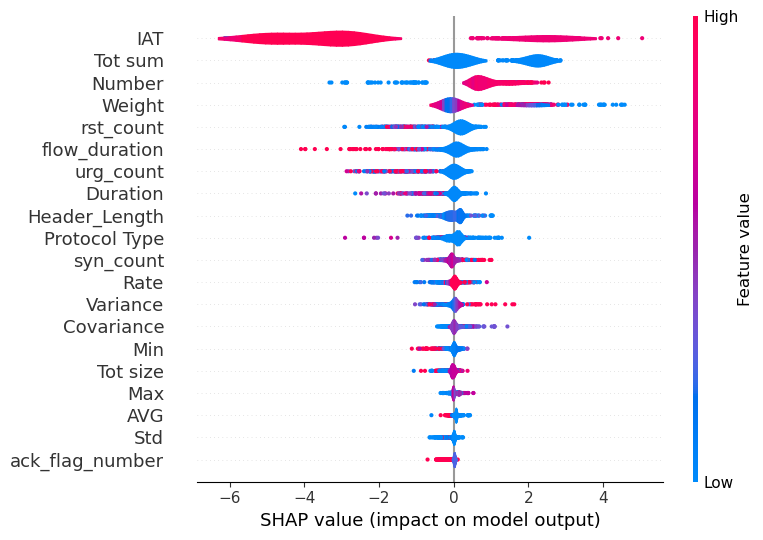

In [109]:
# Identify false negatives for a specific class
specific_class = 0
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

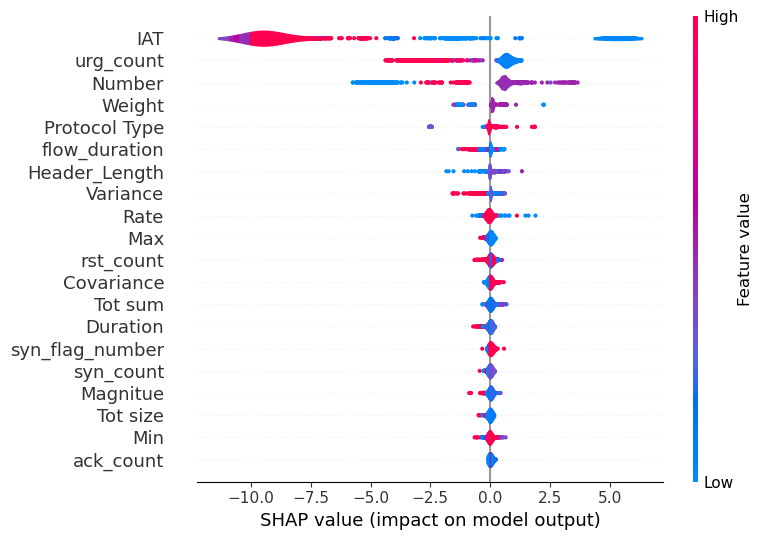

In [77]:
shap.summary_plot(shap_values[:, :, 1], plot_type="violin", class_names=unique_classes, plot_size=0.2)

2073


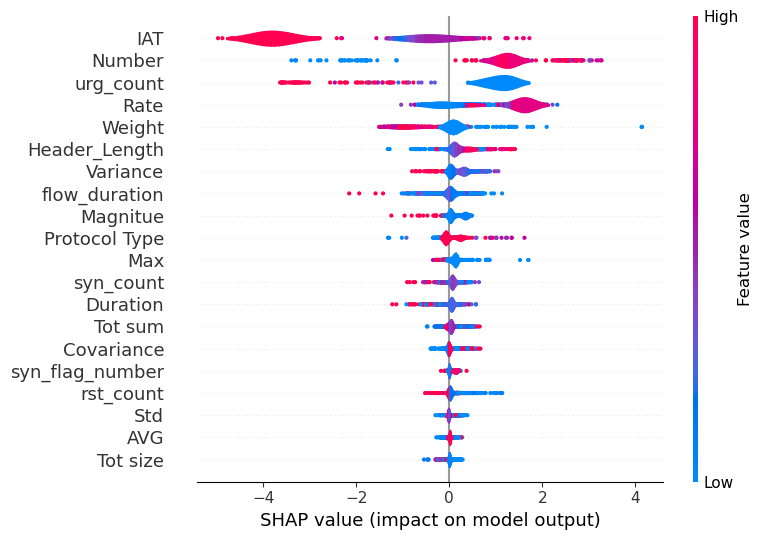

In [108]:
# Identify false positives for a specific class
specific_class = 1
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

364


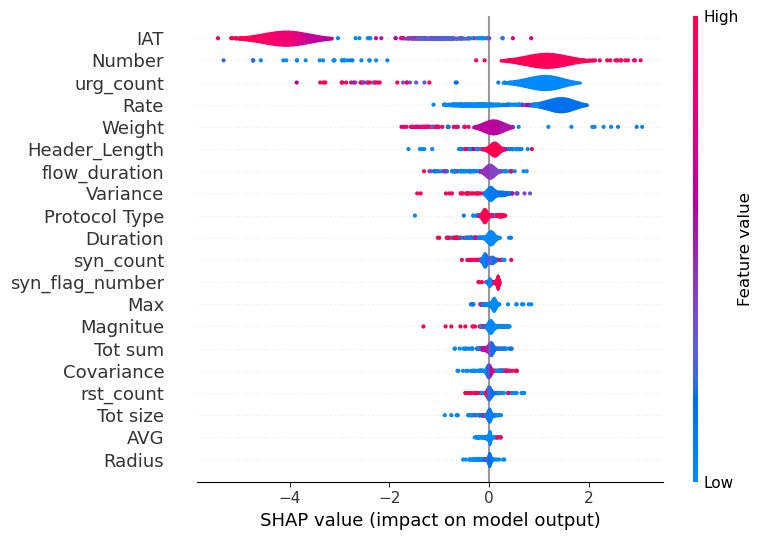

In [107]:
# Identify false negatives for a specific class
specific_class = 1
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

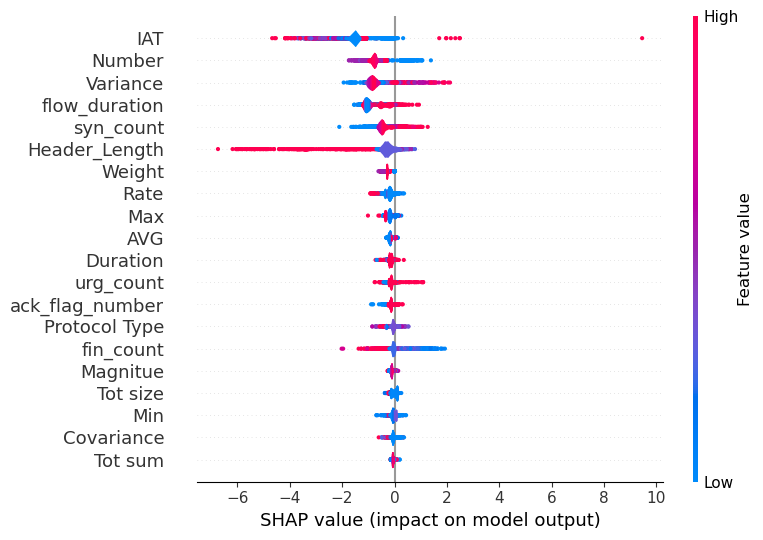

In [80]:
shap.summary_plot(shap_values[:, :, 2], plot_type="violin", class_names=unique_classes, plot_size=0.2)

707


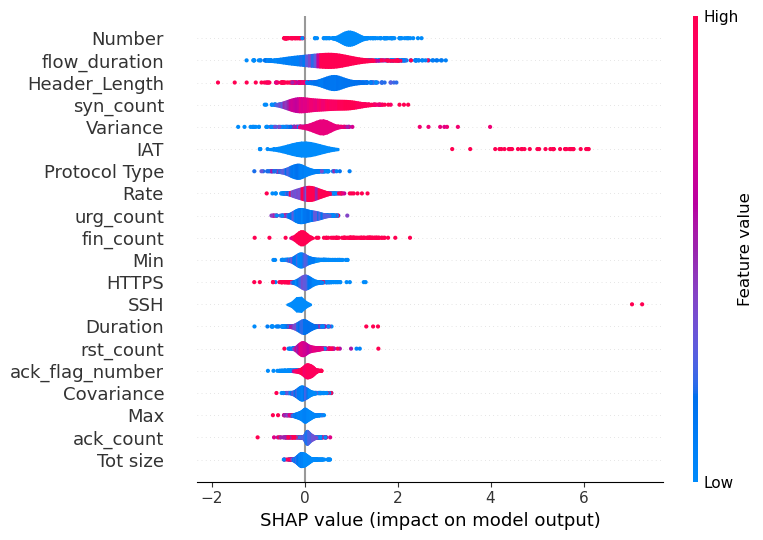

In [105]:
# Identify false positives for a specific class
specific_class = 2
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

846


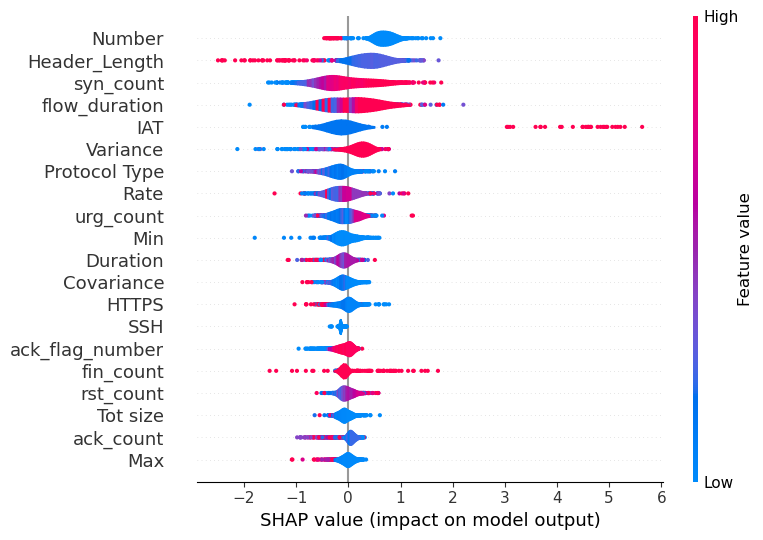

In [106]:
# Identify false negatives for a specific class
specific_class = 2
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

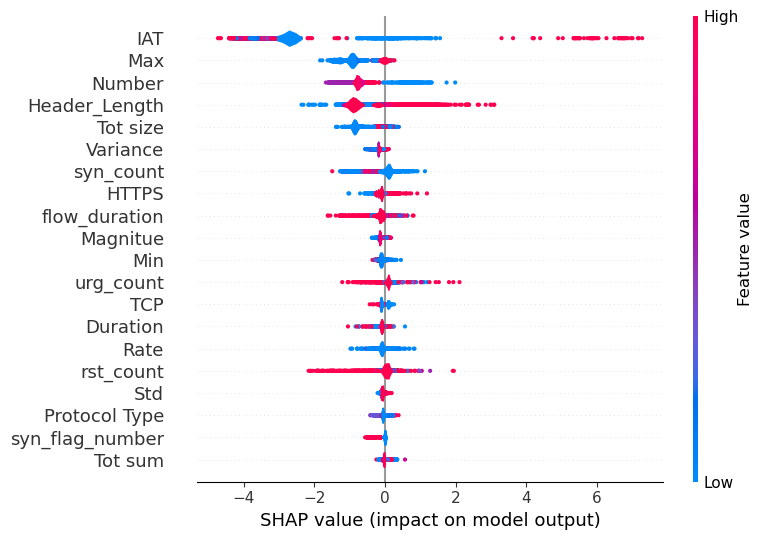

In [83]:
shap.summary_plot(shap_values[:, :, 3], plot_type="violin", class_names=unique_classes, plot_size=0.2)

2959


[16:31:16] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


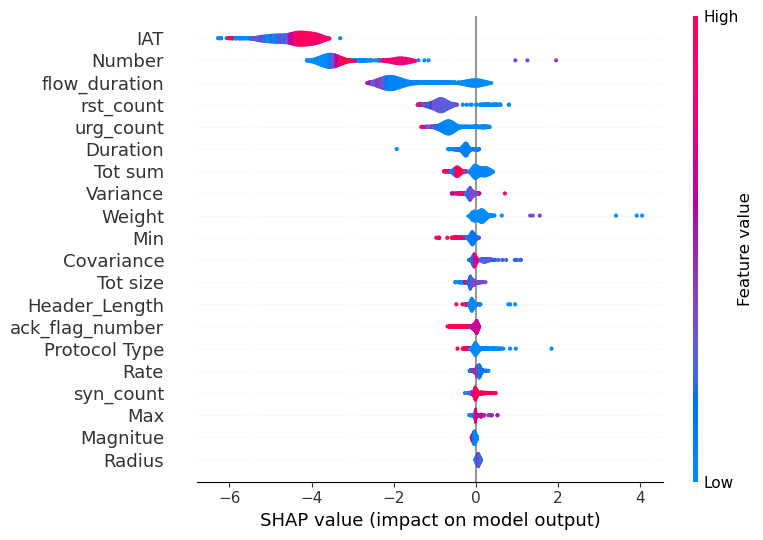

In [84]:
# Identify false positives for a specific class
specific_class = 3
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

17172


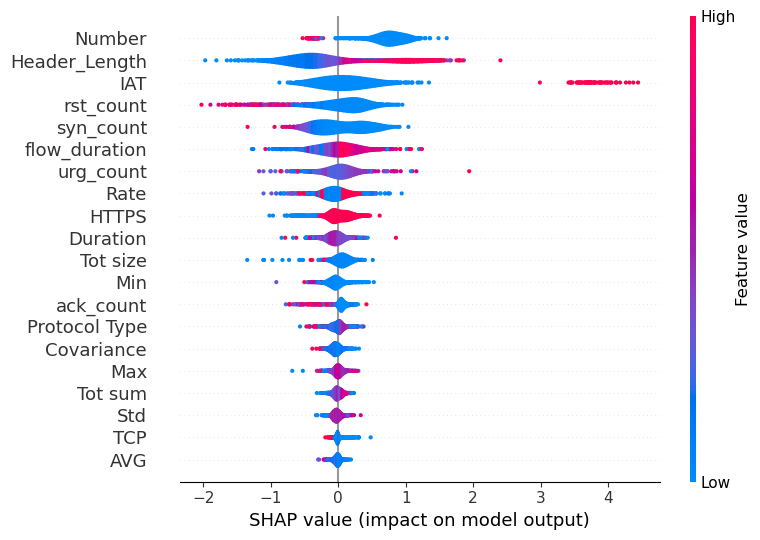

In [104]:
# Identify false negatives for a specific class
specific_class = 3
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

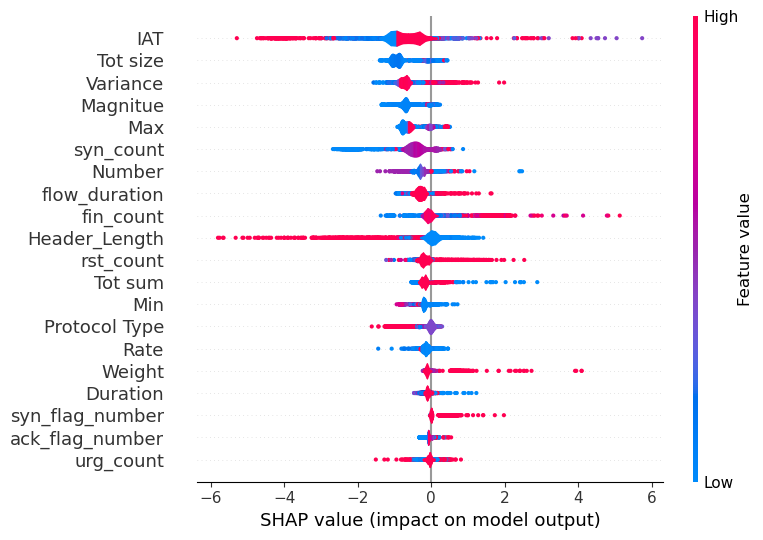

In [86]:
shap.summary_plot(shap_values[:, :, 4], plot_type="violin", class_names=unique_classes, plot_size=0.2)

5750


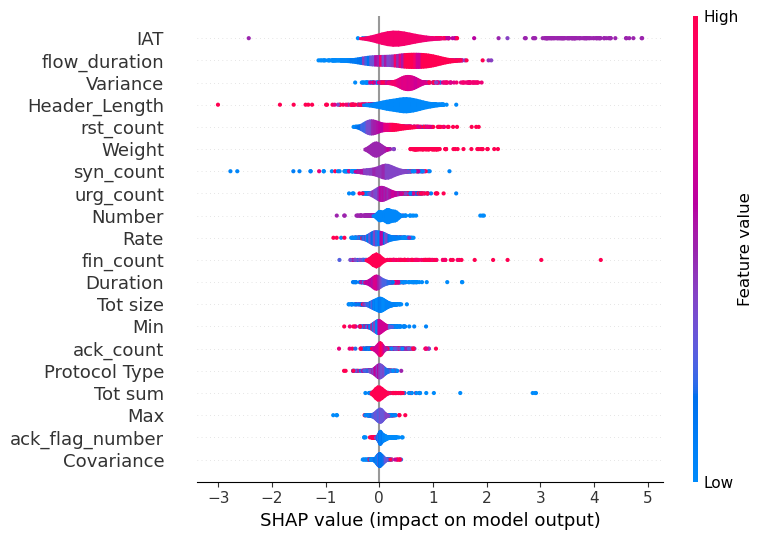

In [102]:
# Identify false positives for a specific class
specific_class = 4
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

12289


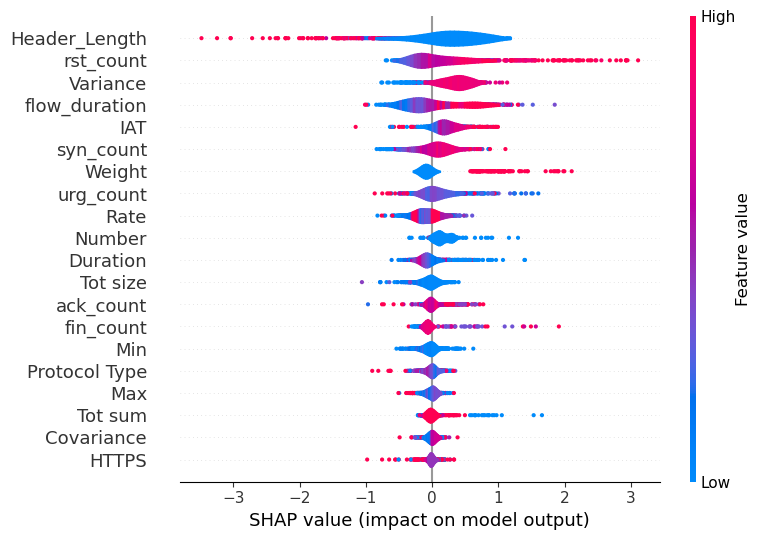

In [103]:
# Identify false negatives for a specific class
specific_class = 4
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

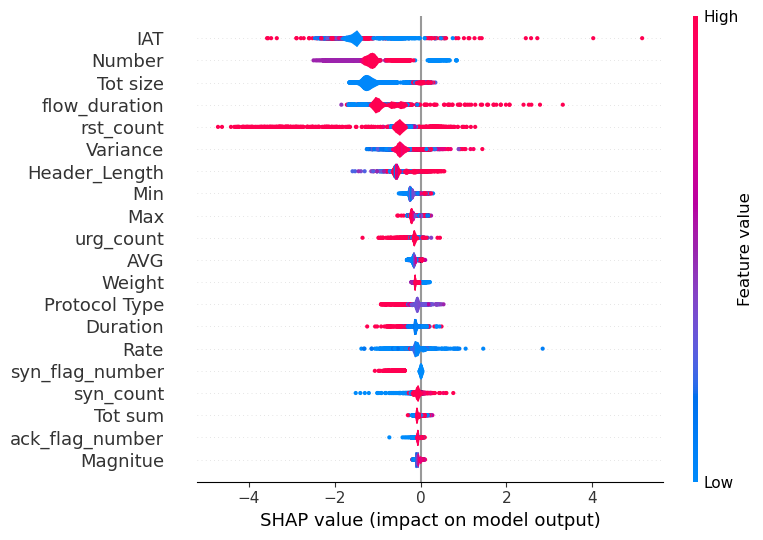

In [90]:
shap.summary_plot(shap_values[:, :, 5], plot_type="violin", class_names=unique_classes, plot_size=0.2)

2894


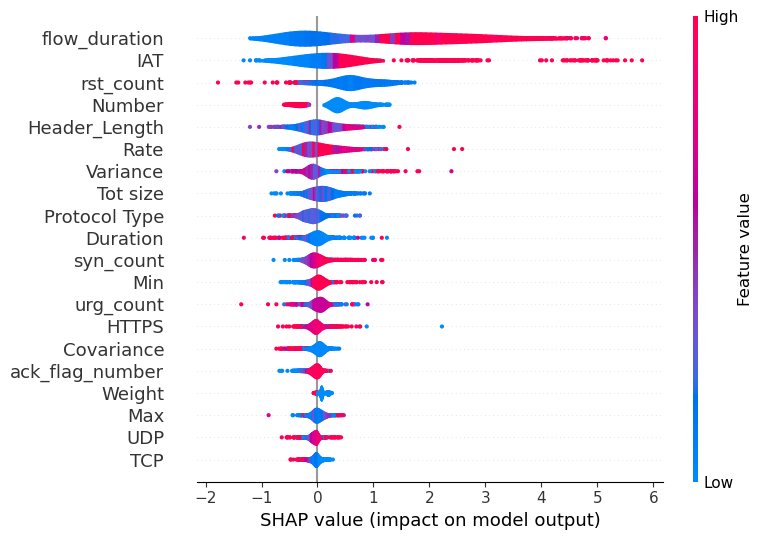

In [101]:
# Identify false positives for a specific class
specific_class = 5
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

1657


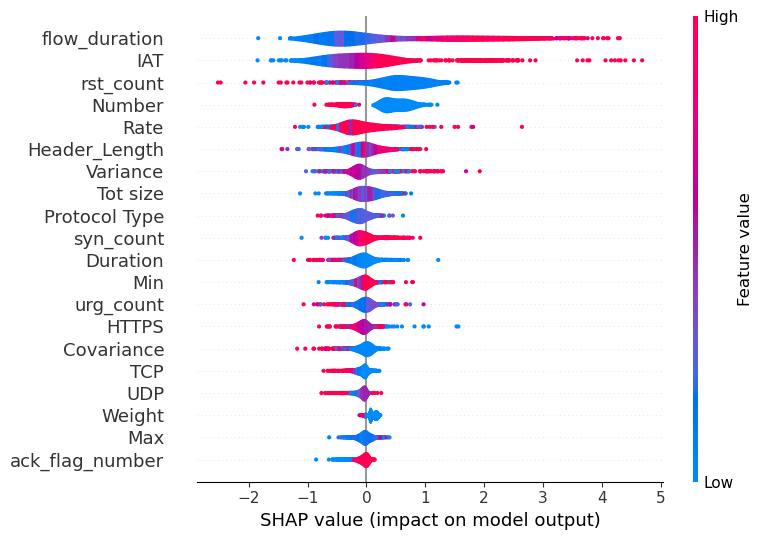

In [100]:
# Identify false negatives for a specific class
specific_class = 5
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

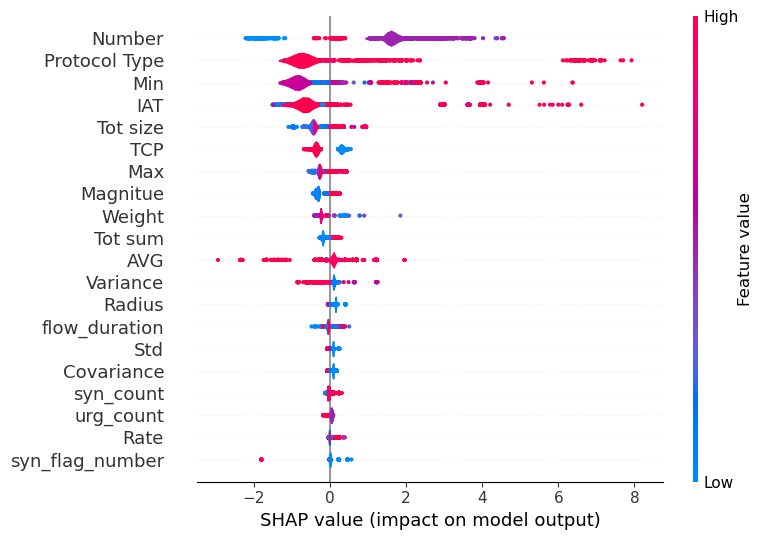

In [93]:
shap.summary_plot(shap_values[:, :, 6], plot_type="violin", class_names=unique_classes, plot_size=0.2)

4


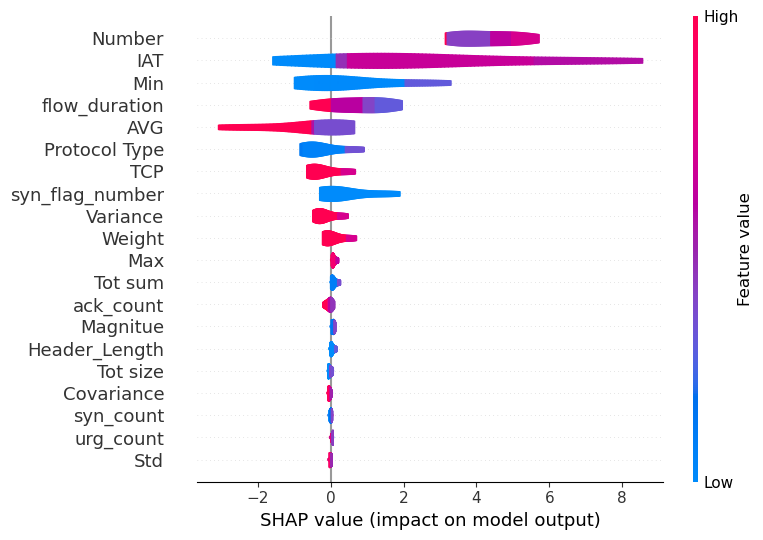

In [94]:
# Identify false positives for a specific class
specific_class = 6
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)])
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

70


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


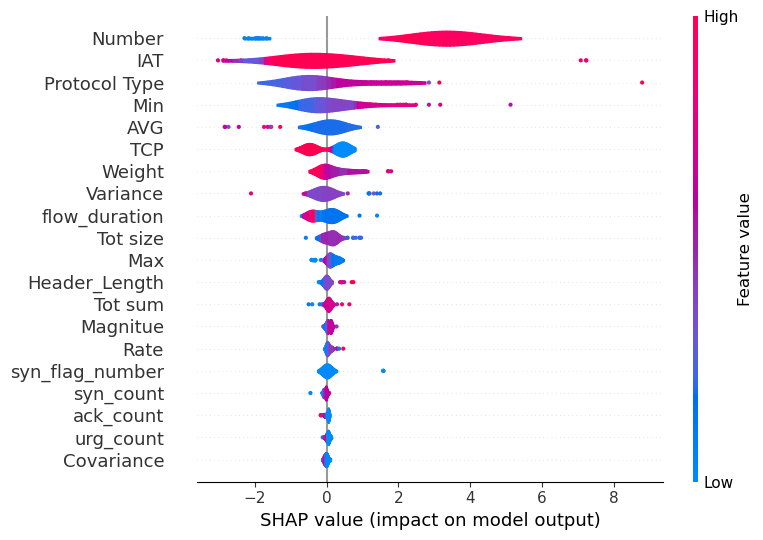

In [95]:
# Identify false negatives for a specific class
specific_class = 6
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

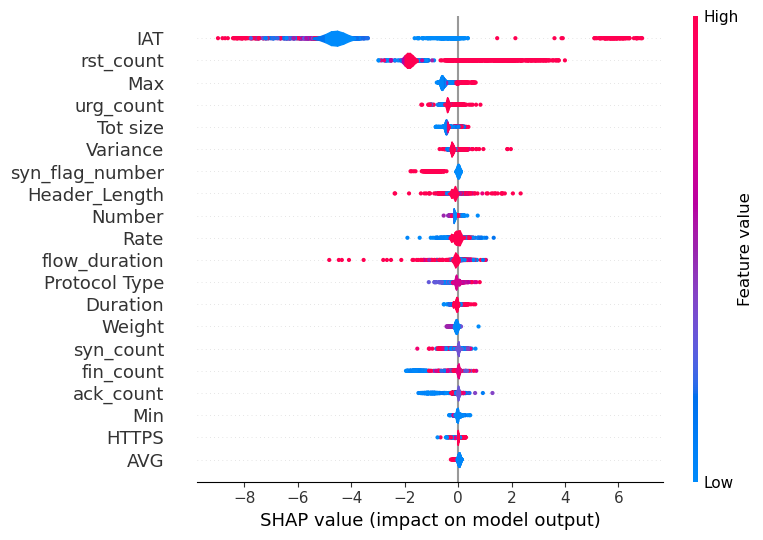

In [96]:
shap.summary_plot(shap_values[:, :, 7], plot_type="violin", class_names=unique_classes, plot_size=0.2)

21803


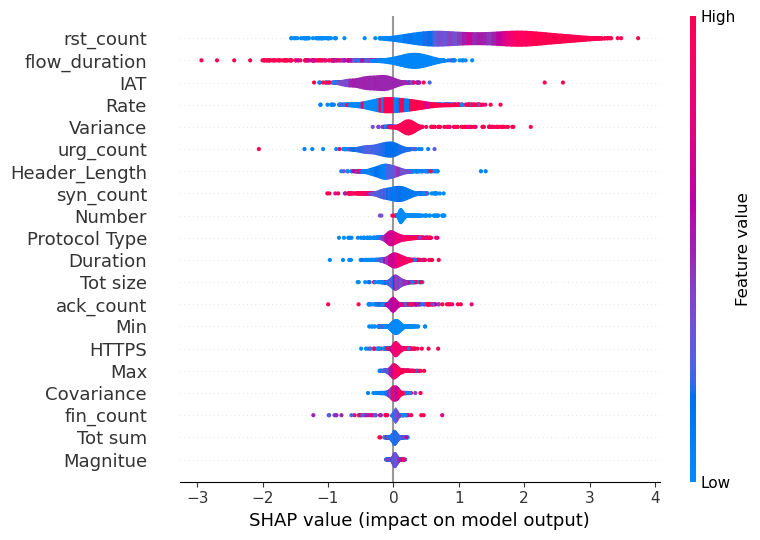

In [98]:
# Identify false positives for a specific class
specific_class = 7
false_positives_indices = np.where((y_test != specific_class) & (xgb_predicted_values == specific_class))[0]
print(len(false_positives_indices))
X_false_positives = X_test[false_positives_indices]
# len(X_false_positives)
fp_0_shap_values = explainer(X_false_positives[:min(len(X_false_positives),1000)],check_additivity=False)
shap.summary_plot(fp_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

1496


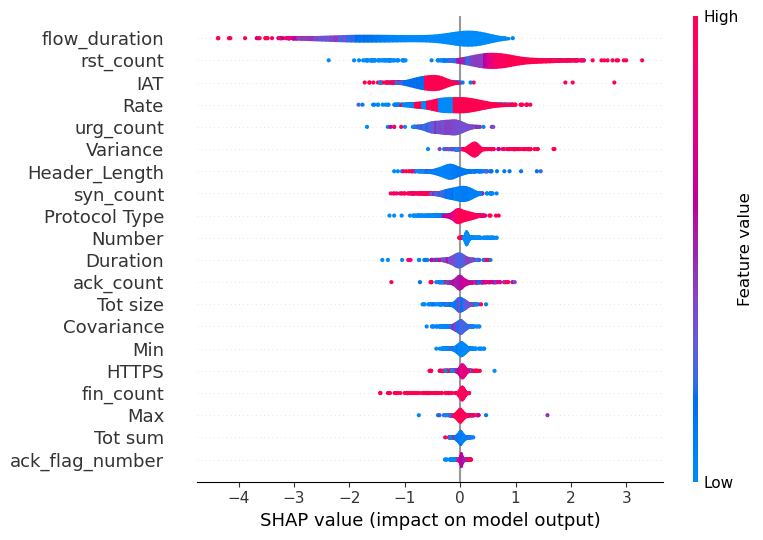

In [99]:
# Identify false negatives for a specific class
specific_class = 7
false_negatives_indices = np.where((y_test == specific_class) & (xgb_predicted_values != specific_class))[0]
print(len(false_negatives_indices))
X_false_negatives = X_test[false_negatives_indices]
# len(X_false_negatives)
fn_0_shap_values = explainer(X_false_negatives[:min(len(X_false_negatives),1000)],check_additivity=False)
shap.summary_plot(fn_0_shap_values[:, :, specific_class], plot_type="violin", feature_names = train_data.columns[:-1], class_names=unique_classes, plot_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_clf = RandomForestClassifier(max_depth=33, n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train+1)

RandomForestClassifier(max_depth=33, random_state=42)

In [34]:
rf_y_pred = rf_clf.predict(X_test)

In [35]:
print(classification_report(y_test+1 , rf_y_pred,target_names=['DDoS','DoS', 'BruteForce', 'Spoofing', 'Recon', 'Web', 'Mirai', 'Benign']))

              precision    recall  f1-score   support

        DDoS       1.00      1.00      1.00   6798313
         DoS       1.00      1.00      1.00   1616144
  BruteForce       0.66      0.68      0.67      2590
    Spoofing       0.97      0.80      0.88     97140
       Recon       0.93      0.79      0.86     70964
         Web       0.47      0.70      0.56      5035
       Mirai       1.00      1.00      1.00    527383
      Benign       0.89      0.99      0.94    219747

    accuracy                           1.00   9337316
   macro avg       0.87      0.87      0.86   9337316
weighted avg       1.00      1.00      1.00   9337316



In [36]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = metrics.accuracy_score(y_test+1, rf_y_pred)
precision = metrics.precision_score(y_test+1, rf_y_pred, average='weighted')
recall = metrics.recall_score(y_test+1, rf_y_pred, average='weighted')
f1 = metrics.f1_score(y_test+1, rf_y_pred, average='weighted')

In [37]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.9956841987569018
Precision: 0.9960219684341325
Recall: 0.9956841987569018
F1 Score: 0.9956345528023148


In [38]:
rf_cm = metrics.confusion_matrix(y_test+1, rf_y_pred)

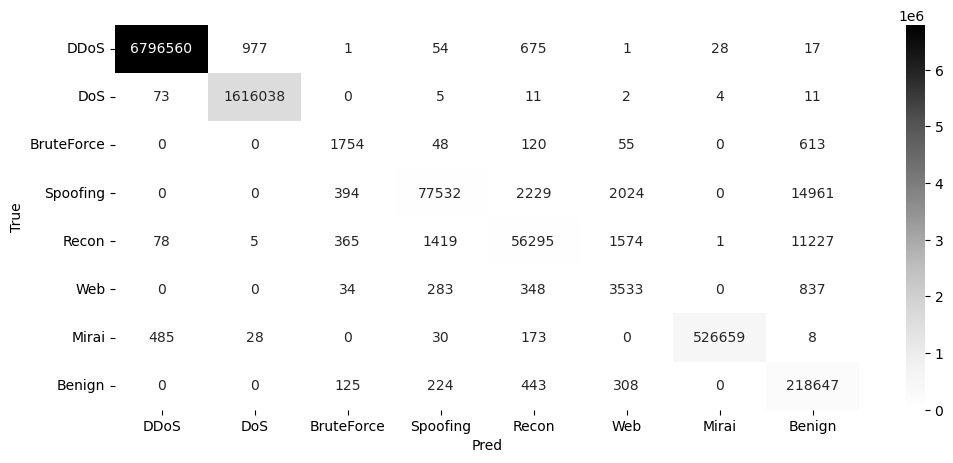

In [39]:
## Plot confusion matrix
unique_classes = ['DDoS','DoS', 'BruteForce', 'Spoofing', 'Recon', 'Web', 'Mirai', 'Benign']
fig, ax = plt.subplots()
sn.heatmap(rf_cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Greys,
            cbar=True)
ax.set(xlabel="Pred", ylabel="True", xticklabels=unique_classes,
       yticklabels=unique_classes)
plt.rcParams["figure.figsize"] = (12,5)
plt.yticks(rotation=0)
plt.show()

In [40]:
# Calculate multiclass Brier score
y_prob = rf_clf.predict_proba(X_test)
multiclass_brier_score = calculate_multiclass_brier_score(y_test+1, y_prob)
print(f'Multiclass Brier score: {multiclass_brier_score:.4f}')

Multiclass Brier score: 0.2444
